<a href="https://colab.research.google.com/github/Sarthak2578/Image_text_translator/blob/main/Image_translator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytesseract
!pip install googletrans==4.0.0-rc1

!sudo apt update
!sudo apt install tesseract-ocr tesseract-ocr-fra tesseract-ocr-chi-sim tesseract-ocr-chi-tra tesseract-ocr-hin
!pip install pytesseract

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=d4d2a8d97f9b70a487951a6aa6bb629ca89adf7dc29af4411186b7bb21cf51f4
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling ch

In [ ]:
from google.colab import files
import cv2
import numpy as np
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt
from googletrans import Translator, LANGUAGES

In [ ]:
translator = Translator()

In [ ]:
def upload_images():
    global uploaded_files
    uploaded = files.upload()
    uploaded_files = list(uploaded.keys())
    if uploaded_files:
        print("Uploaded Files:")
        for i, filename in enumerate(uploaded_files, start=1):
            print(f"{i}. {filename}")
    else:
        print("No files were uploaded.")

In [ ]:
def select_file_by_name():
    if not uploaded_files:
        print("No files available. Please upload files first.")
        return None

    print("Available Files:")
    for filename in uploaded_files:
        print(f"- {filename}")

    while True:
        filename_input = input("Enter the exact name of the file you want to process: ")
        if filename_input in uploaded_files:
            return filename_input
        else:
            print("File not found. Please make sure to enter the exact filename, including extension.")

In [ ]:
def preprocess_image(image_path):
  img = cv2.imread(image_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, (5,5), 0) # noise reduction
  thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2) # Thresholding

  # Contrast Adjustment
  alpha = 1.5 # contrast control
  beta = 0 # brightness control
  adjusted = cv2.convertScaleAbs(thresh, alpha=alpha, beta=beta)

  return img, adjusted

In [ ]:
# Text Extraction using Pytesseract for multiple languages
def extract_text(image):
  languages = 'eng+fra+chi_sim+chi_tra+hin'
  text = pytesseract.image_to_string(image, lang=languages)
  return text

In [ ]:
def translate_text(text):
  translated = translator.translate(text, dest='en')
  return translated.text

In [ ]:
# Main Workflow
def process_image(image_path):
    original_image, processed_image = preprocess_image(image_path)
    detected_text = extract_text(processed_image)
    translated_text = translate_text(detected_text)

    # Display original image
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

    # Display processed image
    plt.figure(figsize=(8, 6))
    plt.imshow(processed_image, cmap='gray')
    plt.title('Processed Image')
    plt.axis('off')
    plt.show()

    print("Detected Text:", detected_text)
    print("Translated Text:", translated_text)

In [ ]:
upload_images()

Saving French_Text.png to French_Text.png
Saving Chinese_text.jpg to Chinese_text.jpg
Saving English_Text.png to English_Text.png
Saving Hindi_text.jpeg to Hindi_text.jpeg
Uploaded Files:
1. French_Text.png
2. Chinese_text.jpg
3. English_Text.png
4. Hindi_text.jpeg


Available Files:
- French_Text.png
- Chinese_text.jpg
- English_Text.png
- Hindi_text.jpeg
Enter the exact name of the file you want to process: Chinese_text.jpg


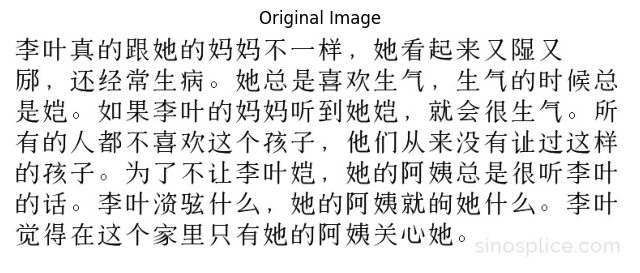

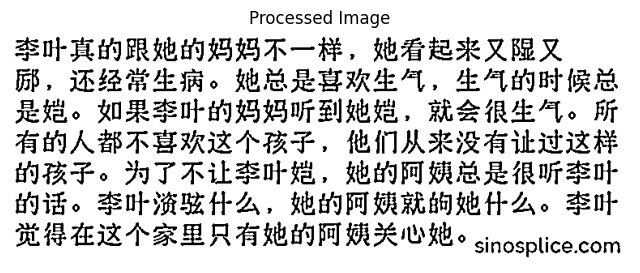

Detected Text: SIA RMR, WR MBER

Gh, 還 經 常 生 病 。 她 總 是 喜歡 生 和 气 , 生 和 气 的 時 候 總
是 旭 。 如 果 李 叶 的 妈妈 听 到 她 炮 ， 就 会 很 生气 。 所
有 的 人 都 不 喜欢 这 个 孩子 ， 他 们 从 来 没有 让 过 这 样
的 孩子 。 为 了 不 让 李 叶 婉 ， 她 的 阿 症 总 是 很 听 李 叶
的 话 。 李 叶 沪 驴 什么 ， 她 的 阿姨 就 的 她 什么 。 李 叶
党 得 在 這 個 家 里 只 有 她 的 阿姨 關心 她 。

sinosplice.com

Translated Text: SIA RMR, WR MBER

GH, still sick.She always likes to be kind and kind, and always always
It's Xu.If Li Ye's mother heard her gun, she would be angry.Place
Some people don’t like this child, they have never let this
Child.In order not to let Li Yewan, her disease always listens to Li Ye very much
if .What is Li Yehu, what her aunt is.Li Ye
The party had only her aunt cared about her in this house.

sinosplice.com


In [ ]:
selected_file = select_file_by_name()
if selected_file:
    process_image(selected_file)